In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere
rng = np.random.default_rng(2020)

In [7]:
def synaptic_input(i_mean: float, start: float, stop: float, step: float) -> (np.ndarray, np.ndarray):
    inputs = []
    times = []
    t = start
    while t < stop:
        i_t = i_mean * (1 + np.sin((2 * np.pi * t) / 0.01))
        inputs.append(i_t)
        times.append(t)
        t += step
    return np.array(inputs), np.array(times)

In [40]:
def membrane_potential(
        initial_potential: float,
        start_t: float,
        stop_t: float,
        step_t: float,
        synaptic_inputs: np.ndarray,
) -> (np.ndarray, np.ndarray):
    potentials = []
    times = []
    t = start_t
    step_idx = 0
    current_potential = initial_potential
    while t < stop_t:
        # Get current state of the neuron
        current_synaptic_input = synaptic_inputs[step_idx] 
        
        # Calculate the next potential using a Euler step
        time_factor = step_t / tau
        next_potential = current_potential + time_factor * (el - current_potential + r * current_synaptic_input)
        
        # Increment state
        t += step_t
        step_idx += 1
        
        # Persist
        potentials.append(next_potential)
        times.append(t)
        current_potential = next_potential 

    return potentials, times

inputs, times = synaptic_input(el, 0, 0.01, dt )
result, times = membrane_potential(el, 0.0, 0.01, dt, inputs)

10 10


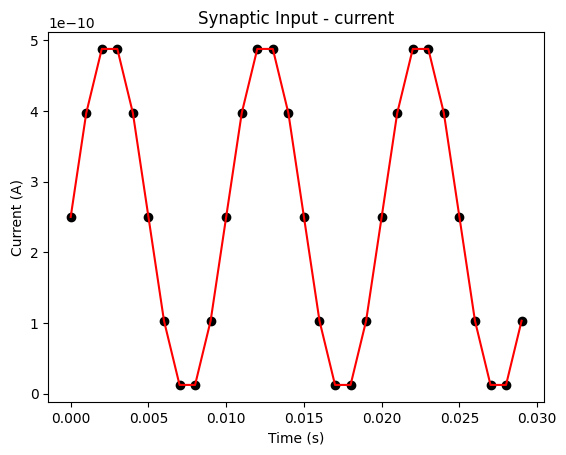

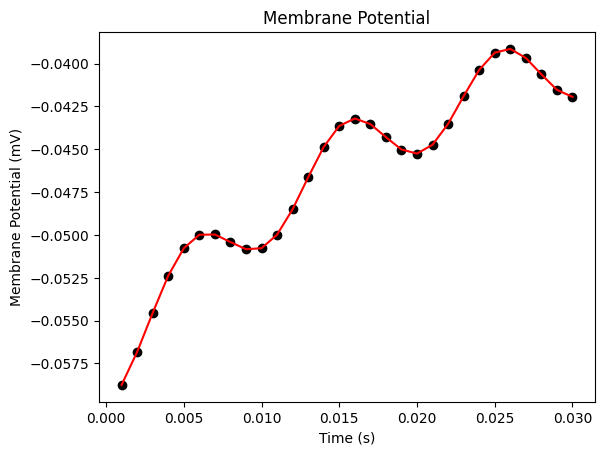

In [41]:
inputs, times = synaptic_input(i_mean, 0, 0.03, dt)

def plot_synaptic_inputs(inputs, times):
    plt.figure()
    plt.title('Synaptic Input - current')
    plt.plot(times, inputs, 'ko')
    plt.plot(times, inputs, 'red')
    plt.xlabel('Time (s)')
    plt.ylabel('Current (A)')
    plt.show()
plot_synaptic_inputs(inputs, times)


result, times = membrane_potential(el, 0.0, 0.03, dt, inputs)
def plot_membrane_potential(result, times):
    plt.figure()
    plt.title('Membrane Potential')
    plt.plot(times, result, 'ko')
    plt.plot(times, result, 'red')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane Potential (mV)')

plot_membrane_potential(result, times)

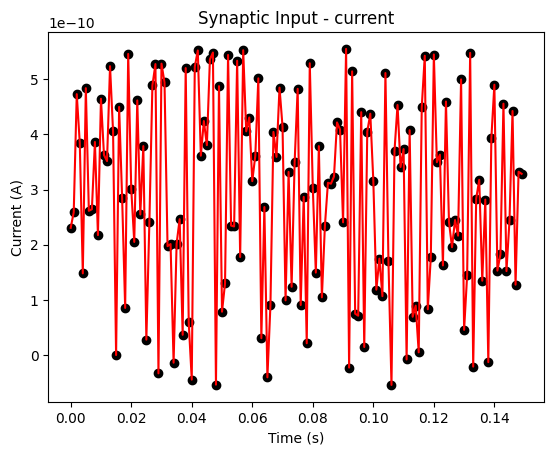

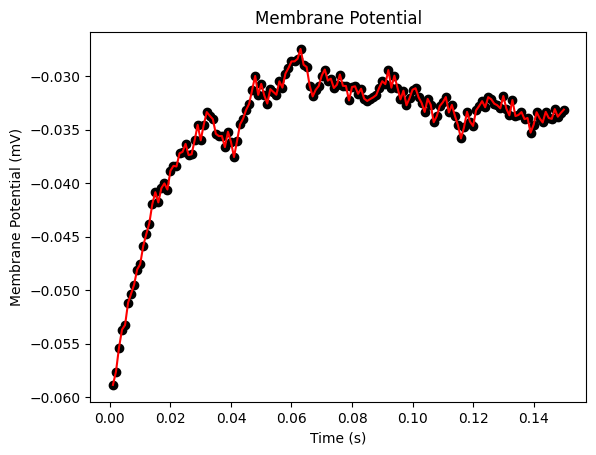

In [42]:
def synaptic_input_random(i_mean: float, start: float, stop: float, step: float, rng) -> (np.ndarray, np.ndarray):
    inputs = []
    times = []
    t = start
    while t < stop:
        random_value = rng.uniform(-1, 1)
        i_t = i_mean * (1 + (0.1 * np.sqrt(stop / step)) * random_value)
        inputs.append(i_t)
        times.append(t)
        t += step
    return np.array(inputs), np.array(times)

random_inputs, times = synaptic_input_random(i_mean, 0.0, t_max, dt, rng)
plot_synaptic_inputs(random_inputs, times)

potentials, times = membrane_potential(el, 0.0, t_max, dt, random_inputs)
plot_membrane_potential(potentials, times)

(2, 150)
[0.00084772 0.00112399 0.00160001 0.00184306 0.00191268 0.00213178
 0.00219164 0.00216543 0.00205939 0.00219173 0.00235264 0.0025061
 0.00239018 0.00268286 0.00278224 0.00254248 0.00273653 0.00278268
 0.00270316 0.00282489 0.00280691 0.00296355 0.00287665 0.00298209
 0.00310355 0.00282253 0.00275368 0.00282452 0.00314238 0.00321839
 0.00318087 0.00305501 0.00296549 0.00294738 0.00307543 0.00317153
 0.00311759 0.00302967 0.00273173 0.00286653 0.00291998 0.00290769
 0.00288163 0.0029413  0.00320168 0.00317305 0.00305981 0.00297958
 0.00301201 0.00284694 0.00270828 0.00267938 0.00258655 0.00262443
 0.00242342 0.00241951 0.00236301 0.00229666 0.00224494 0.0021795
 0.00203566 0.00213299 0.0022472  0.00220021 0.00229826 0.00229965
 0.00238969 0.00248974 0.00258893 0.00254433 0.00244609 0.00256048
 0.00237284 0.00236153 0.00255316 0.00261975 0.00265639 0.00245441
 0.00237796 0.00235997 0.00228579 0.00228999 0.00231263 0.00236955
 0.0025583  0.00257301 0.00246722 0.00251837 0.00238346

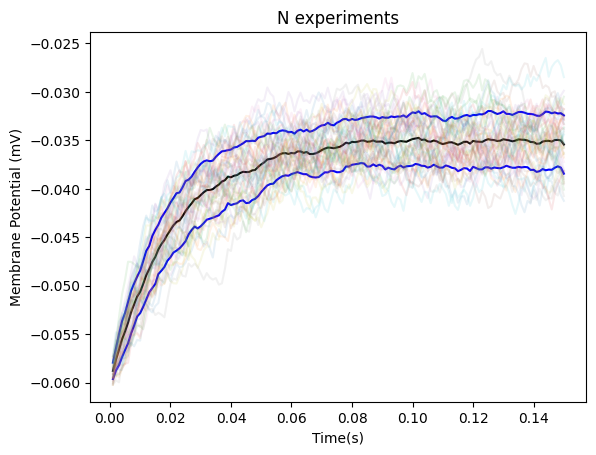

In [68]:
def plot_n_experiments(experiments: np.ndarray, mean: np.ndarray, standard_deviation: np.ndarray):
    plt.figure()
    plt.title("N experiments")
    plt.xlabel("Time(s)")
    plt.ylabel("Membrane Potential (mV)")
    mean_potentials = means[0]
    mean_times = means[1]
    plt.plot(mean_times, mean_potentials, color='black', alpha=1.0)
    plt.plot(mean_times, mean_potentials + standard_deviation, color='blue')
    plt.plot(mean_times, mean_potentials - standard_deviation, color='blue')
    for experiment in experiments:
        potentials, times = experiment[0], experiment[1]
        # plt.plot(times, potentials, 'ko')
        plt.plot(times, potentials, alpha = 0.1)
    plt.show()

def n_membrane_potential_experiments(n: int) -> np.ndarray:
    realizations = []
    for i in range(n):
        synaptic_inputs, _ = synaptic_input_random(i_mean, 0.0, t_max, dt, rng) 
        potentials, times = membrane_potential(el, 0.0, t_max, dt, synaptic_inputs)
        realizations.append([potentials, times])
    return np.array(realizations)

experiments = n_membrane_potential_experiments(50)
means = np.mean(experiments, axis=0)
stdv = np.std(experiments[:,0,:], axis=0) # Select only the potentials
plot_n_experiments(experiments, means, stdv)